Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import os
import random

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image display
import cv2
from PIL import Image


Loading the Dataset

In [3]:
# Define paths
train_path = r'C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\train'
val_path = r'C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\validation'


In [4]:
# Creating Image Data-Generators
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

In [5]:
# Loading images from the train folder
train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)


Found 28821 images belonging to 7 classes.


In [6]:
# Loading images from the validation folder
val_data = val_gen.flow_from_directory(
    val_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

Found 7066 images belonging to 7 classes.


Dataset overview

In [7]:
# Set path to your train directory
train_dir = r"C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\train"

# Loop through each emotion folder
for emotion in os.listdir(train_dir):
    emotion_path = os.path.join(train_dir, emotion)
    image_file = os.listdir(emotion_path)[0]  # take first image
    image_path = os.path.join(emotion_path, image_file)

    # Read image using OpenCV
    img = cv2.imread(image_path)

    if img is not None:
        height, width, channels = img.shape
        file_size_kb = os.path.getsize(image_path) / 1024

        print(f"Emotion: {emotion}")
        print(f"Image: {image_file}")
        print(f"Dimensions: {width} x {height}")
        print(f"Channels: {channels} ({'Grayscale' if channels == 1 else 'RGB'})")
        print(f"File Size: {file_size_kb:.2f} KB")
        print("-" * 40)


Emotion: angry
Image: 0.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.49 KB
----------------------------------------
Emotion: disgust
Image: 10018.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.52 KB
----------------------------------------
Emotion: fear
Image: 10010.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.40 KB
----------------------------------------
Emotion: happy
Image: 100.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.33 KB
----------------------------------------
Emotion: neutral
Image: 1000.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.62 KB
----------------------------------------
Emotion: sad
Image: 10006.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.46 KB
----------------------------------------
Emotion: surprise
Image: 10007.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.44 KB
----------------------------------------


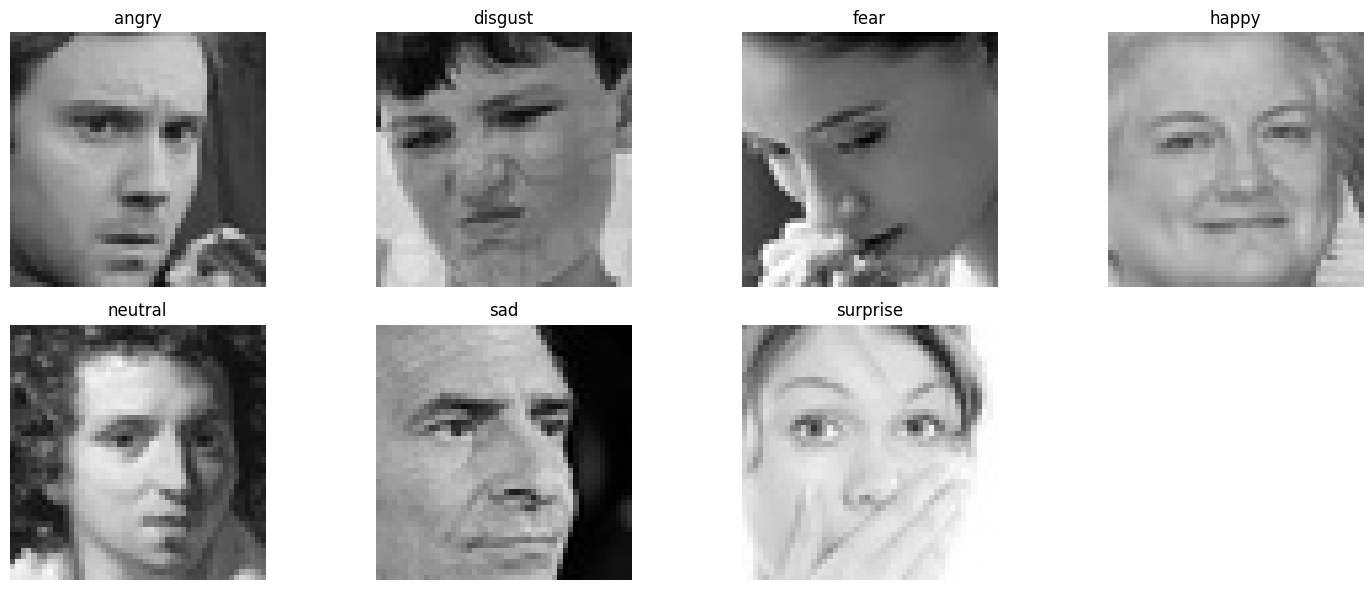

In [8]:
# Get the 7 emotion folder names
emotion_classes = os.listdir(train_dir)

# Plot one image from each folder
plt.figure(figsize=(15, 6))

for idx, emotion in enumerate(emotion_classes):
    emotion_path = os.path.join(train_dir, emotion)
    image_name = os.listdir(emotion_path)[0]  # first image
    image_path = os.path.join(emotion_path, image_name)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB

    plt.subplot(2, 4, idx + 1)
    plt.imshow(img)
    plt.title(emotion)
    plt.axis('off')

plt.tight_layout()
plt.show()
